In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
df = pd.read_csv("Weather forecast data.csv")

In [3]:
df.sample(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2130,12.550488,93.920582,13.302477,90.346087,998.183246,rain
1788,29.725947,89.178275,13.629162,95.362624,1000.897154,no rain
2345,33.387319,67.357675,15.755381,34.956974,980.351083,no rain
1122,34.059877,48.822164,3.322771,49.291774,1035.783980,no rain
904,31.900671,51.170187,15.846980,29.217422,1008.175704,no rain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [5]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [6]:
#experimanting
dfrounded = np.round(df,decimals=2)
print(f"Before:\n{df.head()}")
print("\n\n\n")
print(f"After:\n{dfrounded.head()}")

Before:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614189  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain




After:
   Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure     Rain
0        23.72     89.59        7.34        50.50   1032.38     rain
1        27.88     46.49        5.95         4.99    992.61  no rain
2        25.07     83.07        1.37        14.86   1007.23  no rain
3        23.62     74.37        7.05        67.26    982.63     rain
4        20.59     96.86        4.64        47.68    980.83  no rain


In [7]:
print(dfrounded.columns)

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')


Rain
no rain    2186
rain        314
Name: count, dtype: int64


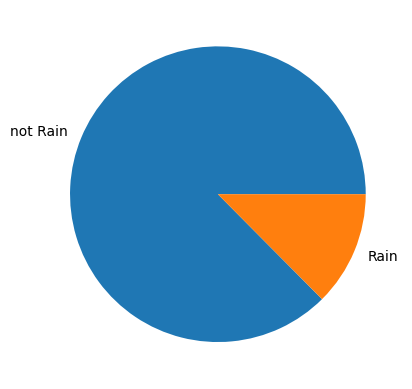

In [8]:
#checking % of rain or not
val_counts = dfrounded['Rain'].value_counts()
print(val_counts)
plt.pie(val_counts,labels=["not Rain","Rain"])
plt.show()

In [9]:
#spliting the data
from sklearn.model_selection import train_test_split
x = dfrounded.drop(columns=["Rain"])
y = dfrounded["Rain"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)




In [10]:
print(y_train.value_counts())

Rain
no rain    1743
rain        257
Name: count, dtype: int64


In [11]:
print(y_test.value_counts())

Rain
no rain    443
rain        57
Name: count, dtype: int64


In [12]:
#using smote for imbalanced data
#in this we convert that data into balanced by creating more data samples but these points are correct not mandatory
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_balanced,y_train_balanced = smote.fit_resample(x_train,y_train)
print(x_train_balanced.shape)
print(y_train_balanced.shape)

(3486, 5)
(3486,)


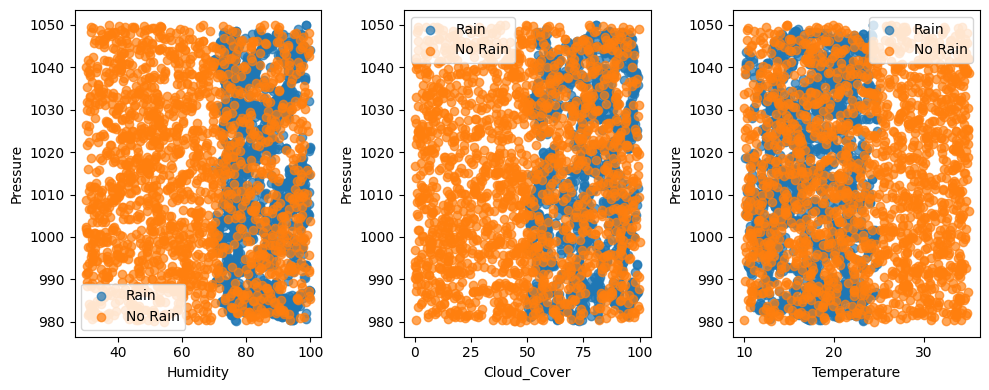

In [13]:
#plotting the scatter plot on this
rain = x_train_balanced[y_train_balanced == "rain"]
no_rain = x_train_balanced[y_train_balanced == "no rain"]

plt.figure(figsize=(10,4))
#------- plot 1 ---------#
plt.subplot(1,3,1)
plt.scatter(rain["Humidity"], rain["Pressure"], label="Rain", alpha=0.7)
plt.scatter(no_rain["Humidity"], no_rain["Pressure"], label="No Rain", alpha=0.7)

plt.xlabel("Humidity")
plt.ylabel("Pressure")
plt.legend()


#-------- plot 2 -------#
plt.subplot(1,3,2)
plt.scatter(rain["Cloud_Cover"], rain["Pressure"], label="Rain", alpha=0.7)
plt.scatter(no_rain["Cloud_Cover"], no_rain["Pressure"], label="No Rain", alpha=0.7)

plt.xlabel("Cloud_Cover")
plt.ylabel("Pressure")
plt.legend()

#-------- plot 2 -------#
plt.subplot(1,3,3)
plt.scatter(rain["Temperature"], rain["Pressure"], label="Rain", alpha=0.7)
plt.scatter(no_rain["Temperature"], no_rain["Pressure"], label="No Rain", alpha=0.7)

plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.legend()



plt.tight_layout()
plt.show()




In [14]:
# starting svm and logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_balanced,y_train_balanced)

LogisticRegression()

In [15]:
#accuracy from this(logistic regression) model
from sklearn.metrics import accuracy_score, classification_report
y_pred = lr.predict(x_test)
print(f"accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(classification_report(y_test,y_pred))

accuracy score: 0.894

              precision    recall  f1-score   support

     no rain       0.99      0.89      0.94       443
        rain       0.52      0.89      0.66        57

    accuracy                           0.89       500
   macro avg       0.75      0.89      0.80       500
weighted avg       0.93      0.89      0.91       500



In [16]:
#above precision of rain is very bad so try svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_balanced,y_train_balanced)

#finding the accuracy
svm_pred = svm.predict(x_test)
print(f"accuracy score: {accuracy_score(y_test,svm_pred)}")
print(classification_report(y_test,svm_pred))

accuracy score: 0.828
              precision    recall  f1-score   support

     no rain       0.99      0.81      0.89       443
        rain       0.39      0.95      0.56        57

    accuracy                           0.83       500
   macro avg       0.69      0.88      0.73       500
weighted avg       0.92      0.83      0.85       500



In [17]:
#svm also giving me bad results
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,120,130,150]
}

rfc = RandomForestClassifier()

grid = GridSearchCV(rfc,param_grid=params)
grid.fit(x_train_balanced,y_train_balanced)

print(f"best param: {grid.best_params_}")
print(f"best model: {grid.best_estimator_}")

model = grid.best_estimator_

best param: {'n_estimators': 130}
best model: RandomForestClassifier(n_estimators=130)


In [19]:
# checking the accuracy from this model
#best at n_estimators = 130
rnd_pred = model.predict(x_test)
print("accuracy score:",accuracy_score(y_test,rnd_pred))
print(classification_report(y_test,rnd_pred))

accuracy score: 0.998
              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       443
        rain       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [20]:
#saving this model
import joblib

joblib.dump(model,"trained_model.pkl")

['trained_model.pkl']

In [22]:
exp = {
    "Temperature":24,
    "Humidity":88,
    "Wind_Speed":14,
    "Cloud_Cover":85,
    "Pressure":1002
}
pred_data = pd.DataFrame([exp])
model.predict(pred_data)

array(['rain'], dtype=object)